# Fish Weight Prediction By Multiple Linear Regression

# Introduction 

In this study we are using Python 3 environment to create a machine learning model and to predict the weight of the fish which is based on the body parameters of fish species.we are going to use Linear regression model from sklearn library. Since there are multiple features its Multiple/Multi Variable Linear Regression problem.
    The aim of this study is to estimate weight of the fish from their measurements through using linear regression model.This study can be improved to use in fish farms. Individual fish swimming in front of the camera can be measured from the video image and the weight of the fish can be estimated through the linear regression model.

# Step 1: Import The Libraries 

1. numpy            : Numpy is thedata analysis library. It is used for working with arrays and matrices.
2. pandas           : pandas is also data analysis as well as data visualization library Used for data manipulation and analysis
3. matplotlib       : It’s plotting library, and we are going to use it for data visualization
4. seaborn          : It is also data visualization library, based on matplotlib
5. linear_model     : Sklearn linear regression model
6. train_test_split : helper function from Sklearn library for splitting the dataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load The Dataset

>Our data set name is 'fish parameter.csv' which includes the columns Spacies,Weight,Length1,Length2,Length3,Height,Width

In [2]:
data = pd.read_csv('../input/fish-weight-prediction/Fish.csv')
df = data.copy() # to create the copy of data set and assigned in to the other variabel
df.head()  #head(n) returns first n records only.and also we can use sample(n) for random n records.

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Step 3: Understanding Of The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


There are total 159 rows(training samples) and 7 columns in dataset.

Each column details are as below:

Column Name	   -        Details
1. Species	   -  Species name of fish
2. Weight	   -  Weight of fish in gram
3. Length1	   -  Vertical length in CM
4. Length2	   -  Diagonal length in CM
5. Length3     -  Cross length in CM
6. Height	   -  Height in CM
7. Width	   -  Diagonal width in CM

Independent variables --> 'Species', 'Length1','Length2', 'Length3', 'Height' and 'Width'

Dependent variable  -->'Weight'
So, we have to estimate the weight of the fish based on its measurement values.

### Basic statistics

In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Step 4: Data Analysis & Visualization

>isna() will return 'True' is value is 'None' or 'numpy.NaN'
Characters such as empty strings '' or 'numpy.inf' are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True)
you can also use df.isnull()

In [5]:
df.isnull().sum() # To find out is their any null value in dataset

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Get count for each species

In [6]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
print(sp)
type(sp)


           Species
Perch           56
Bream           35
Roach           20
Pike            17
Smelt           14
Parkki          11
Whitefish        6


pandas.core.frame.DataFrame

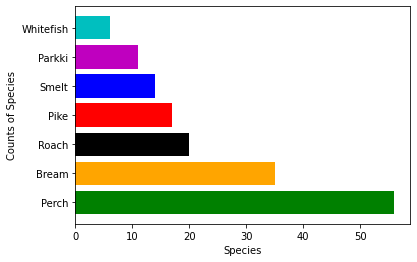

In [7]:
x=sp.index 
y=sp['Species']
c=['g','orange','k','r','b','m','c']
plt.barh(x,y,color=c)
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

### Note


>As you can see our dataset is small. We haveing only 6 training example for 'Whitefish' species.
Ideal approach would be to divide the dataset and do the prediction for each species. But since we don't have enough data we will ignore the different species during our analysis.

## Data understanding

>From above data we observe that their is significant change in statistical parameters due to outliers to obtain maximum output.

## Correlation checking
> Correlation helps us investigate and establish relationships between variables

> Note that high amount of correlation between independent variables suggest that linear regression estimation will be unreliable


In [8]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

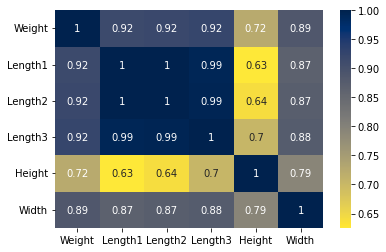

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='cividis_r')

## How to read correlation matrix :
- Correlation coefficient range from -1 to +1

- Sign(+/-) indicate the direction and amount indicate the strength of correlation

- +1.00 means perfect positive relationship

- 0.00 means no relationship

- -1.00 means perfect negative relationship

- The correlation between 'Length1','Length2','Length3' is almost 1.

This will cause 'Multicolinearity' and if we don't take care of it, it may lead to unreliable predictions.

## Pear plot visualization :

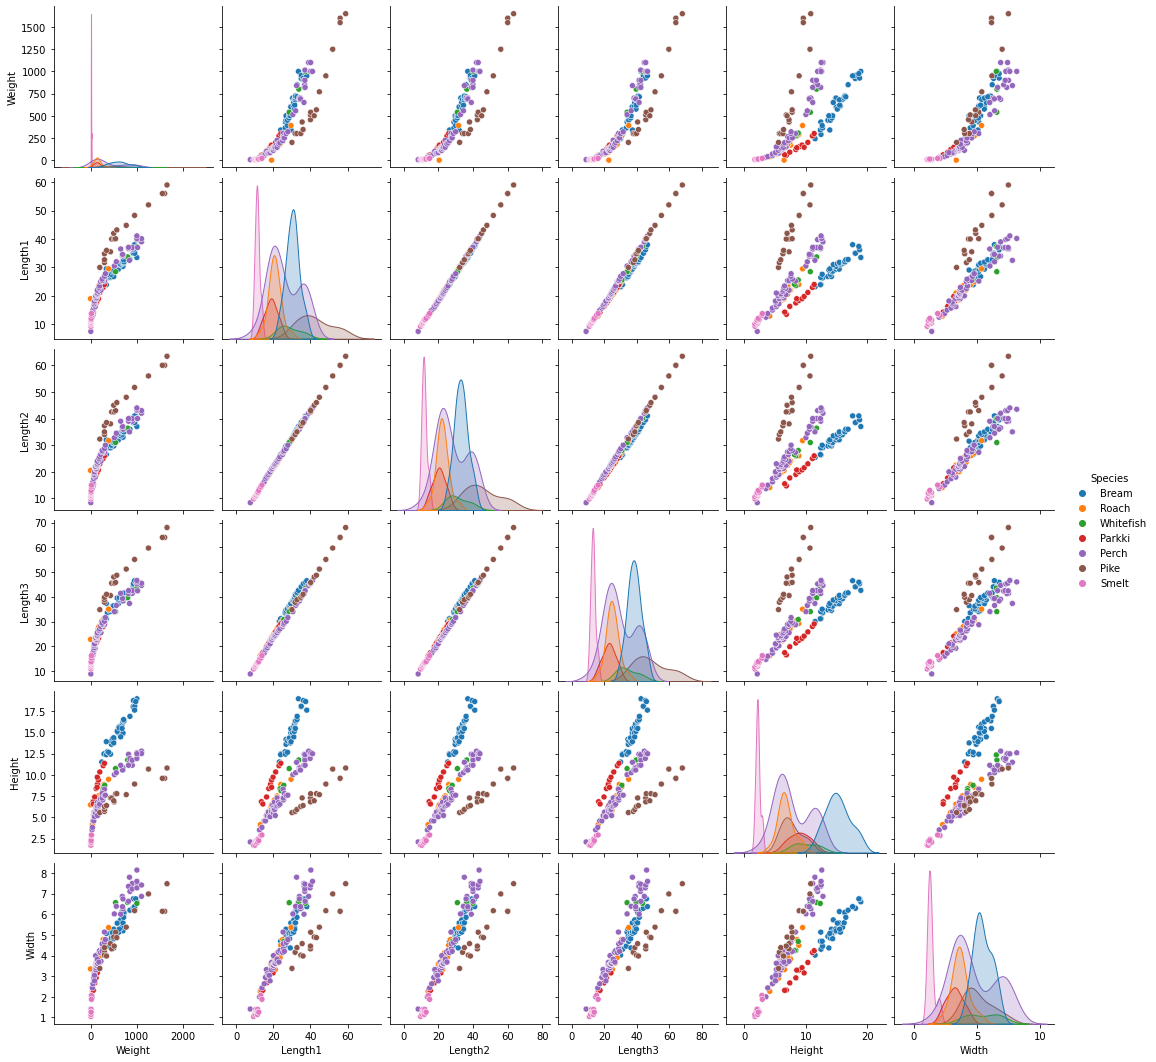

In [10]:
g = sns.pairplot(df, kind='scatter', hue='Species')

## Finding and removing outliers -

- Outlier is an extremely high or extremely low value in our data.
- Lets use box plot for outlier visualization.

- Vertical line on the left side of box plot represent the 'min' value of dataset and vertical line on right side of box plot represent the 'max' value of dataset. Any value which is outside this range is outlier and represented by '*'

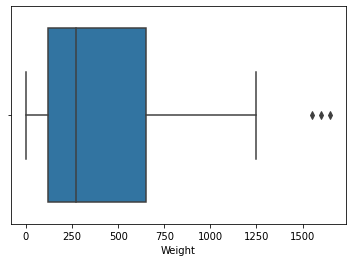

In [11]:
sns.boxplot(x=df['Weight']);

From above figure it is clear that there are three outliers.So, we can find out these outliers by using IQR as follows :

In [12]:
dfw = df.Weight
dfw_Q1 = df.Weight.quantile(0.25)
dfw_Q3 = df.Weight.quantile(0.75)
from scipy.stats import iqr
dfw_IQR=iqr(df['Weight'])
dfw_low = dfw_Q1 - (1.5 * dfw_IQR)
dfw_top = dfw_Q3 + (1.5 * dfw_IQR)

In [13]:
dfw_outliers = dfw[(dfw < dfw_low) | (dfw > dfw_top)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

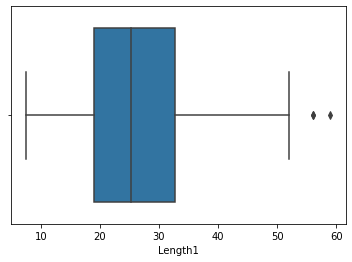

In [14]:
sns.boxplot(x=df['Length1']);

In [15]:
dfl1 = df['Length1']
dfl1_Q1 = dfl1.quantile(0.25)
dfl1_Q3 = dfl1.quantile(0.75)
from scipy.stats import iqr
dfl1_IQR=iqr(df['Length1'])
dfl1_low = dfl1_Q1 - (1.5 * dfl1_IQR)
dfl1_top = dfl1_Q3 + (1.5 * dfl1_IQR)

In [16]:
dfl1_outliers = dfl1[(dfl1 < dfl1_low) | (dfl1 > dfl1_top)]
dfl1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

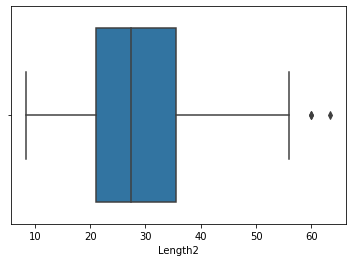

In [17]:
sns.boxplot(x=df['Length2']);

In [18]:
dfl2 = df['Length2']
dfl2_Q1 = dfl2.quantile(0.25)
dfl2_Q3 = dfl2.quantile(0.75)
from scipy.stats import iqr
dfl2_IQR=iqr(df['Length2'])
dfl2_low = dfl2_Q1 - (1.5 * dfl2_IQR)
dfl2_top = dfl2_Q3 + (1.5 * dfl2_IQR)

In [19]:
dfl2_outliers = dfl2[(dfl2 < dfl2_low) | (dfl2 > dfl2_top)]
dfl2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

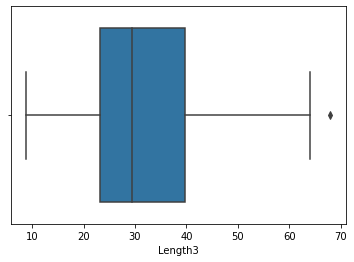

In [20]:
sns.boxplot(x=df['Length3']);

In [21]:
dfl3 = df['Length3']
dfl3_Q1 = dfl3.quantile(0.25)
dfl3_Q3 = dfl3.quantile(0.75)
from scipy.stats import iqr
dfl3_IQR=iqr(df['Length2'])
dfl3_low = dfl3_Q1 - (1.5 * dfl3_IQR)
dfl3_top = dfl3_Q3 + (1.5 * dfl3_IQR)

In [22]:
dfl3_outliers = dfl3[(dfl3 < dfl3_low) | (dfl3 > dfl3_top)]
dfl3_outliers

142    64.0
143    64.0
144    68.0
Name: Length3, dtype: float64

In [23]:
dfl3_IQR,dfl3_low,dfl3_top

(14.5, 1.3999999999999986, 61.400000000000006)

In [24]:
df[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


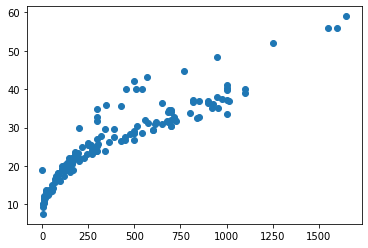

In [25]:
x=df['Weight']
y=df['Length1']
plt.scatter(x,y);

##  Remove outliers :

In our data set index number 142,143 and 144 are the outliers,in our study we are removing entries in the rows of the dataset 

In [26]:
df1=df.drop([142,143,144])

In [27]:
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
df1.shape

(156, 7)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [30]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


# Step 5: Machine Learning Model

>Create feature/independent variable X and target varible/dependent variable Y

In [31]:
y = df1['Weight']   #dependent variabel
X = df1.iloc[:,2:7]  #independent variabel

## Create test and train dataset

>We will split the dataset in the ratio of 7:3 for training and testing.So, we can use one set for training(X_train,Y_train) and another set for testing(X_test,Y_test).

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

In [33]:
print('X_train shape: ', np.shape(X_train))
print('y_train shape: ', np.shape(y_train))
print('X_test shape: ', np.shape(X_test))
print('y_test shape: ', np.shape(y_test))

X_train shape:  (109, 5)
y_train shape:  (109,)
X_test shape:  (47, 5)
y_test shape:  (47,)


## Multiple Linear Regression Formula :

>y = b0 + b1X1 + b2X2 + b3X3 + ... + bnXn

y : Dependent variable

b0 : Constant

b1 - bn : Coefficients

X1 - Xn : Independent variables

## Model  parameters :

In [34]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [35]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -411.4439410419045
Model coefficients:  [ 97.01851351 -50.94935253 -27.85762748  30.29769788  64.02671324]


In [36]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -411.44 + 97.02*X1 -50.95*X2 -27.86*X3 + 30.30*X4 + 64.03*X5


## Prediction by using model

### Predicting weights from train dataset 

In [37]:
y_head = reg.predict(X_train)

### Calculation of r2_score

In [38]:
r2_score(y_train, y_head)

0.9112296955551396

>However, if we modify random state, our train and test samples will differ, as will our model's score. I'm going to use cross validation to get rid of this change:

## Cross validation

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=6, scoring='r2')
print(cross_val_score_train)

[0.93553834 0.94364866 0.91796402 0.944122   0.85522612 0.82694609]


In [40]:
cross_val_score_train.mean()

0.9039075389512937

In [41]:
y_pred = reg.predict(X_test)

In [42]:
print(r2_score(y_test, y_pred))

0.8817250665483263


# Step:6  Visualization Of Prediction

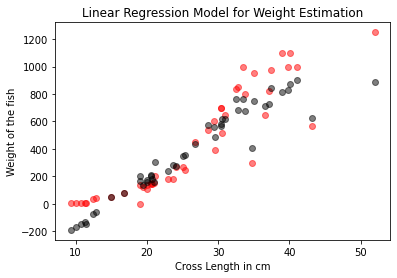

In [43]:
plt.scatter(X_test['Length1'], y_test, color='r', alpha=0.5)
plt.scatter(X_test['Length1'], y_pred, color='k', alpha=0.5)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

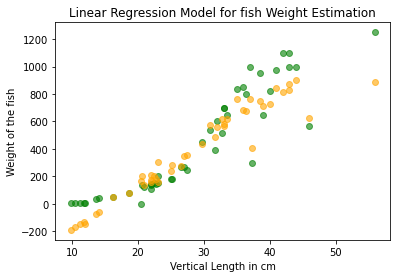

In [44]:
plt.scatter(X_test['Length2'], y_test, color='green', alpha=0.6)
plt.scatter(X_test['Length2'], y_pred, color='orange', alpha=0.6)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for fish Weight Estimation');

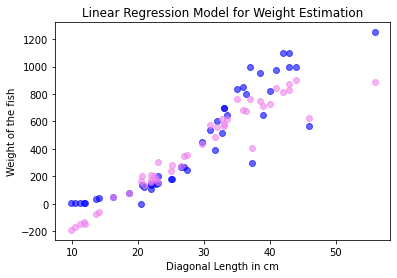

In [45]:
plt.scatter(X_test['Length2'], y_test, color='blue', alpha=0.6)
plt.scatter(X_test['Length2'], y_pred, color='violet', alpha=0.6)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

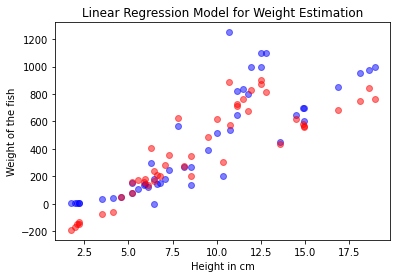

In [46]:
plt.scatter(X_test['Height'], y_test, color='blue', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='red', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

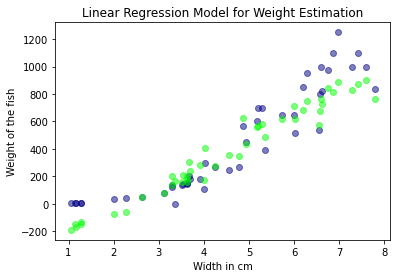

In [47]:
plt.scatter(X_test['Width'], y_test, color='navy', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='lime', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

## Comparission of predicted weight with actual weight 

In [48]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated_new_Weight'])
y_pred1.head()

,Estimated_new_Weight
0,711.166977
1,46.934904
2,281.837495
3,747.677998
4,-58.721354


>As you can see from the table above, when real weights are less than 50gm, forecasted weights are negative.
Scatter plots can also be used to depict the above comparison.

In [49]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [50]:
comparission = pd.concat([y_test1, y_pred1], axis=1)
comparission

,Weight,Estimated_new_Weight
0,650.0,711.166977
1,51.5,46.934904
2,180.0,281.837495
3,955.0,747.677998
4,40.0,-58.721354
5,0.0,163.067768
6,600.0,558.370555
7,514.0,618.521294
8,272.0,351.171571
9,9.8,-144.522093


In [51]:
new = pd.concat([y_test1, y_pred1], axis=1)
new

,Weight,Estimated_new_Weight
0,650.0,711.166977
1,51.5,46.934904
2,180.0,281.837495
3,955.0,747.677998
4,40.0,-58.721354
5,0.0,163.067768
6,600.0,558.370555
7,514.0,618.521294
8,272.0,351.171571
9,9.8,-144.522093


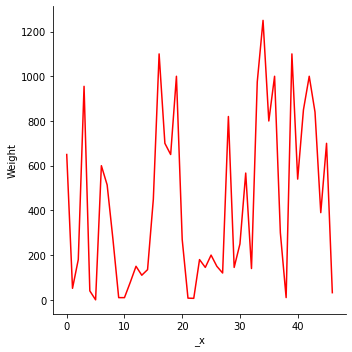

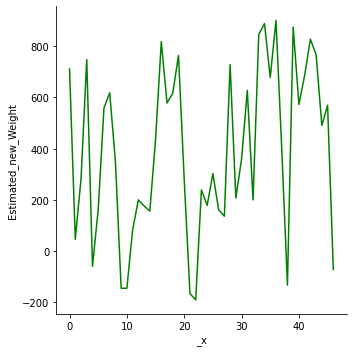

In [52]:
sns.relplot(x=np.arange(47),y='Weight',data=new,kind='line',color='r')
sns.relplot(x=np.arange(47),y='Estimated_new_Weight',data=new,kind='line',color='green')
plt.show()

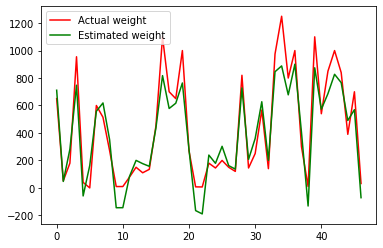

In [53]:
x=np.arange(47)
y=new['Weight']
z=new['Estimated_new_Weight']
plt.plot(x,y,color='r',label='Actual weight')
plt.plot(x,z,color='g',label='Estimated weight')
plt.legend()
plt.show()

# Step:7  Conclusion

- Our model score is 91.12%, which is excellent enough to start with, as you can see from the above data.
- However, one challenge with prediction is the presence of negative weight values. 
- Every time we solve a problem in machine learning, we make decisions that have an impact on the outcome.
- We also made a few decisions, such as treating all species as one due to the short dataset.